In [1]:
import pandas as pd

orderdetailsdf = pd.read_excel(r'Order Details.xlsx')
orderdetailsdf.head()

,Order ID,Product,Unit Price,Quantity,Discount
0,10248,Queso Cabrales,14.0,12,0.0
1,10248,Singaporean Hokkien Fried Mee,9.8,10,0.0
2,10248,Mozzarella di Giovanni,34.8,5,0.0
3,10249,Tofu,18.6,9,0.0
4,10249,Manjimup Dried Apples,42.4,40,0.0


In [2]:
orderdetailsdf['Unit Price'] =  orderdetailsdf['Unit Price'] - (orderdetailsdf['Discount'] * orderdetailsdf['Unit Price'])

In [3]:
orderdetailsdf.head()

,Order ID,Product,Unit Price,Quantity,Discount
0,10248,Queso Cabrales,14.0,12,0.0
1,10248,Singaporean Hokkien Fried Mee,9.8,10,0.0
2,10248,Mozzarella di Giovanni,34.8,5,0.0
3,10249,Tofu,18.6,9,0.0
4,10249,Manjimup Dried Apples,42.4,40,0.0


In [4]:
#inspeksi data ordersdf 
ordersdf = pd.read_excel(r'Orders.xlsx')
ordersdf.head()

,Order ID,Customer,Employee,Order Date,Required Date,Shipped Date,Ship Via,Freight,Ship Name,Ship Address,Ship City,Ship Region,Ship Postal Code,Ship Country
0,10248,Vins et alcools Chevalier,"Buchanan, Steven",1994-08-04,1994-09-01,1994-08-16,Federal Shipping,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,NaN,51100,France
1,10249,Toms Spezialitäten,"Suyama, Michael",1994-08-05,1994-09-16,1994-08-10,Speedy Express,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,NaN,44087,Germany
2,10250,Hanari Carnes,"Peacock, Margaret",1994-08-08,1994-09-05,1994-08-12,United Package,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,RJ,05454-876,Brazil
3,10251,Victuailles en stock,"Leverling, Janet",1994-08-08,1994-09-05,1994-08-15,Speedy Express,41.34,Victuailles en stock,"2, rue du Commerce",Lyon,NaN,69004,France
4,10252,Suprêmes délices,"Peacock, Margaret",1994-08-09,1994-09-06,1994-08-11,United Package,51.30,Suprêmes délices,"Boulevard Tirou, 255",Charleroi,NaN,B-6000,Belgium


In [5]:
#mencari order ID terakhir pada tahun 1994 pada tabel ORDERS untuk dicari pada tabel ORDER-DETAILS
ordersdf[ordersdf['Order Date'] == '1994-12-30']

,Order ID,Customer,Employee,Order Date,Required Date,Shipped Date,Ship Via,Freight,Ship Name,Ship Address,Ship City,Ship Region,Ship Postal Code,Ship Country
120,10368,Ernst Handel,"Fuller, Andrew",1994-12-30,1995-01-27,1995-01-02,United Package,101.95,Ernst Handel,Kirchgasse 6,Graz,NaN,8010,Austria


In [6]:
#mencari order ID terakhir pada tahun 1995 pada tabel ORDERS untuk dicari pada tabel ORDER-DETAILS
ordersdf[ordersdf['Order Date'] == '1995-12-29']

,Order ID,Customer,Employee,Order Date,Required Date,Shipped Date,Ship Via,Freight,Ship Name,Ship Address,Ship City,Ship Region,Ship Postal Code,Ship Country
510,10758,Richter Supermarkt,"Leverling, Janet",1995-12-29,1996-01-26,1996-01-04,Federal Shipping,138.17,Richter Supermarkt,Starenweg 5,Genève,NaN,1204,Switzerland
511,10759,Ana Trujillo Emparedados y helados,"Leverling, Janet",1995-12-29,1996-01-26,1996-01-12,Federal Shipping,11.99,Ana Trujillo Emparedados y helados,Avda. de la Constitución 2222,México D.F.,NaN,05021,Mexico


In [7]:
#mencari order ID pertama pada tahun 1996 pada tabel ORDERS untuk dicari pada tabel ORDER-DETAILS
#ID: 10760

### 4.a : Volume dan total penjualan tertinggi tahun 1994

In [8]:
OD_1994 = orderdetailsdf[orderdetailsdf["Order ID"] <= 10368]
OD_1994

,Order ID,Product,Unit Price,Quantity,Discount
0,10248,Queso Cabrales,14.00,12,0.0
1,10248,Singaporean Hokkien Fried Mee,9.80,10,0.0
2,10248,Mozzarella di Giovanni,34.80,5,0.0
3,10249,Tofu,18.60,9,0.0
4,10249,Manjimup Dried Apples,42.40,40,0.0
...,...,...,...,...,...
319,10367,Original Frankfurter grüne Soße,10.40,7,0.0
320,10368,Sir Rodney's Scones,7.20,5,0.1
321,10368,Rössle Sauerkraut,32.76,13,0.1
322,10368,Ravioli Angelo,15.60,25,0.0


In [9]:
orderdetailsunique = orderdetailsdf['Product'].unique()
orderdetailslist = orderdetailsunique.tolist()

In [10]:
len(orderdetailslist)

77

In [11]:
for item in orderdetailslist:
    itemdf = OD_1994[OD_1994['Product'] == item]
    print("{}: {}".format(item, itemdf['Quantity'].sum()))
    penjualan_tertinggi = (itemdf['Unit Price'] * itemdf['Quantity'])
    print("Penjualan tertinggi:{}".format(penjualan_tertinggi.sum()))
    print("------------------------------------------")

Queso Cabrales: 110
Penjualan tertinggi:1606.0800000000002
------------------------------------------
Singaporean Hokkien Fried Mee: 37
Penjualan tertinggi:378.0
------------------------------------------
Mozzarella di Giovanni: 173
Penjualan tertinggi:4712.35
------------------------------------------
Tofu: 28
Penjualan tertinggi:520.8
------------------------------------------
Manjimup Dried Apples: 145
Penjualan tertinggi:5509.88
------------------------------------------
Jack's New England Clam Chowder: 106
Penjualan tertinggi:751.905
------------------------------------------
Louisiana Fiery Hot Pepper Sauce: 135
Penjualan tertinggi:2171.4
------------------------------------------
Gustaf's Knäckebröd: 6
Penjualan tertinggi:95.76
------------------------------------------
Ravioli Angelo: 133
Penjualan tertinggi:2063.1
------------------------------------------
Sir Rodney's Marmalade: 66
Penjualan tertinggi:4147.2
------------------------------------------
Geitost: 137
Penjualan te

#### Volume tertinggi 1994: Gorgonzola Telino (280), Total penjualan tertinggi 1994: Côte de Blaye ($18550.4)

In [12]:
#tester
quesosum = OD_1994[OD_1994['Product'] == 'Queso Cabrales']
quesosum['Quantity'].sum()

110

#### Total penjualan tertinggi tahun 1995

In [13]:
OD_1995 = orderdetailsdf[(orderdetailsdf["Order ID"] >= 10369) & (orderdetailsdf["Order ID"] <= 10759)]
OD_1995

,Order ID,Product,Unit Price,Quantity,Discount
324,10369,Thüringer Rostbratwurst,99.00,20,0.00
325,10369,Gnocchi di nonna Alice,22.80,18,0.25
326,10370,Chai,12.24,15,0.15
327,10370,Wimmers gute Semmelknödel,26.60,30,0.00
328,10370,Longlife Tofu,6.80,20,0.15
...,...,...,...,...,...
1345,10757,Wimmers gute Semmelknödel,33.25,24,0.00
1346,10758,Gumbär Gummibärchen,31.23,20,0.00
1347,10758,Filo Mix,7.00,60,0.00
1348,10758,Outback Lager,15.00,40,0.00


In [14]:
for item in orderdetailslist:
    itemdf = OD_1995[OD_1995['Product'] == item]
    print("{}: {}".format(item, itemdf['Quantity'].sum()))
    penjualan_tertinggi = (itemdf['Unit Price'] * itemdf['Quantity'])
    print("Penjualan tertinggi:{}".format(penjualan_tertinggi.sum()))
    print("------------------------------------------")

Queso Cabrales: 289
Penjualan tertinggi:5310.69
------------------------------------------
Singaporean Hokkien Fried Mee: 417
Penjualan tertinggi:4996.6
------------------------------------------
Mozzarella di Giovanni: 400
Penjualan tertinggi:12427.38
------------------------------------------
Tofu: 340
Penjualan tertinggi:6820.387500000001
------------------------------------------
Manjimup Dried Apples: 331
Penjualan tertinggi:16024.02
------------------------------------------
Jack's New England Clam Chowder: 483
Penjualan tertinggi:4322.717500000001
------------------------------------------
Louisiana Fiery Hot Pepper Sauce: 428
Penjualan tertinggi:8117.885000000001
------------------------------------------
Gustaf's Knäckebröd: 199
Penjualan tertinggi:4023.6
------------------------------------------
Ravioli Angelo: 124
Penjualan tertinggi:2156.7
------------------------------------------
Sir Rodney's Marmalade: 136
Penjualan tertinggi:9711.900000000001
--------------------------

#### Volume tertinggi 1995: Gnocchi di nonna Alice (909). Total penjualan tertinggi 1995: Côte de Blaye: $51569.585.

In [15]:
#Tester
quesosum = OD_1995[OD_1995['Product'] == 'Queso Cabrales']
quesosum['Quantity'].sum()

289

#### Total penjualan tertinggi tahun 1996

In [16]:
OD_1996 = orderdetailsdf[orderdetailsdf["Order ID"] >= 10760]
OD_1996

,Order ID,Product,Unit Price,Quantity,Discount
1350,10760,NuNuCa Nuß-Nougat-Creme,10.5000,12,0.25
1351,10760,Schoggi Schokolade,43.9000,40,0.00
1352,10760,Ipoh Coffee,34.5000,30,0.25
1353,10761,NuNuCa Nuß-Nougat-Creme,10.5000,35,0.25
1354,10761,Rhönbräu Klosterbier,7.7500,18,0.00
...,...,...,...,...,...
2150,11077,Wimmers gute Semmelknödel,32.2525,2,0.03
2151,11077,Louisiana Hot Spiced Okra,17.0000,1,0.00
2152,11077,Röd Kaviar,14.8500,2,0.01
2153,11077,Rhönbräu Klosterbier,7.7500,4,0.00


In [17]:
for item in orderdetailslist:
    itemdf = OD_1996[OD_1996['Product'] == item]
    print("{}: {}".format(item, itemdf['Quantity'].sum()))
    penjualan_tertinggi = (itemdf['Unit Price'] * itemdf['Quantity'])
    print("Penjualan tertinggi:{}".format(penjualan_tertinggi.sum()))
    print("------------------------------------------")

Queso Cabrales: 307
Penjualan tertinggi:5985.0
------------------------------------------
Singaporean Hokkien Fried Mee: 243
Penjualan tertinggi:3200.4
------------------------------------------
Mozzarella di Giovanni: 233
Penjualan tertinggi:7760.4
------------------------------------------
Tofu: 36
Penjualan tertinggi:650.3025
------------------------------------------
Manjimup Dried Apples: 410
Penjualan tertinggi:20285.75
------------------------------------------
Jack's New England Clam Chowder: 392
Penjualan tertinggi:3605.7225
------------------------------------------
Louisiana Fiery Hot Pepper Sauce: 182
Penjualan tertinggi:3580.605
------------------------------------------
Gustaf's Knäckebröd: 143
Penjualan tertinggi:3003.0
------------------------------------------
Ravioli Angelo: 177
Penjualan tertinggi:3441.75
------------------------------------------
Sir Rodney's Marmalade: 111
Penjualan tertinggi:8704.26
------------------------------------------
Geitost: 202
Penjualan

#### Volume tertinggi 1996: Konbu (679). Total penjualan tertinggi 1996: Côte de Blaye ($71276.75).

In [18]:
#Tester
quesosum = OD_1996[OD_1996['Product'] == 'Queso Cabrales']
quesosum['Quantity'].sum()

307

In [19]:
#all_tester: queso: 110 + 289 + 307 = 706

for item in orderdetailslist:
    itemdf = orderdetailsdf[orderdetailsdf['Product'] == item]
    print("{}: {}".format(item, itemdf['Quantity'].sum()))
    penjualan_tertinggi = (itemdf['Unit Price'] * itemdf['Quantity'])
    print("Penjualan tertinggi:{}".format(penjualan_tertinggi.sum()))
    print("------------------------------------------")

Queso Cabrales: 706
Penjualan tertinggi:12901.77
------------------------------------------
Singaporean Hokkien Fried Mee: 697
Penjualan tertinggi:8575.0
------------------------------------------
Mozzarella di Giovanni: 806
Penjualan tertinggi:24900.129999999997
------------------------------------------
Tofu: 404
Penjualan tertinggi:7991.49
------------------------------------------
Manjimup Dried Apples: 886
Penjualan tertinggi:41819.65
------------------------------------------
Jack's New England Clam Chowder: 981
Penjualan tertinggi:8680.345000000001
------------------------------------------
Louisiana Fiery Hot Pepper Sauce: 745
Penjualan tertinggi:13869.89
------------------------------------------
Gustaf's Knäckebröd: 348
Penjualan tertinggi:7122.360000000001
------------------------------------------
Ravioli Angelo: 434
Penjualan tertinggi:7661.549999999999
------------------------------------------
Sir Rodney's Marmalade: 313
Penjualan tertinggi:22563.36
---------------------

Sumarry:
#### Volume tertinggi 1994: Gorgonzola Telino (280). Total penjualan tertinggi 1994: Côte de Blaye ($18550.4).

#### Volume tertinggi 1995: Gnocchi di nonna Alice (909). Total penjualan tertinggi 1995: Côte de Blaye ($51569.585.).

#### Volume tertinggi 1996: Konbu (679). Total penjualan tertinggi 1996: Côte de Blaye ($71276.75).

#### Karena volume tertinggi berbeda-beda setiap tahunnya, maka akan kita fokuskan ke total penjualan tertinggi.

In [20]:
from matplotlib import pyplot
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd

def forecast(total_adjusted):
    regressor = LinearRegression()
    x = np.arange(1, len(total_adjusted) + 1)
    regressor.fit(x.reshape(-1,1), total_adjusted)
    intercept = regressor.intercept_
    slope = regressor.coef_
    df = pd.DataFrame(data=np.arange(1, 8))
    df[1] = slope * df[0] + intercept

    pyplot.bar(df[0], df[1], color="red")
    pyplot.xticks(df[0], ['1994','1995','1996','1997', '1998', '1999', '2000'])
    pyplot.title('Forecast 4 tahun Côte de Blaye')
    pyplot.show()

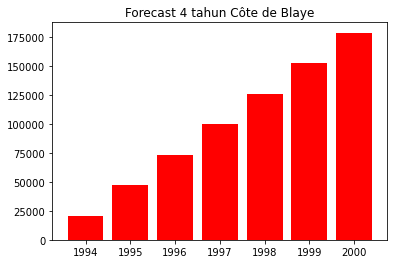

In [21]:
forecast([18550.4, 51569.585, 71276.75])

#### Dari data diatas dapat dilihat bahwa dalam 4 tahun, diprediksi bahwa pertumbuhan total penjualan Côte de Blaye akan meningkat lebih dari 2x lipat. Sebagai produk yang menghasilkan keuntungan paling besar, kami menyarankan managemen Northwind Traders untuk terus memelihara pasokan dari produk ini.

In [22]:
productsdf = pd.read_excel(r'Products.xlsx')
productsdf.head()

,Product ID,Product Name,Supplier,Category,Quantity Per Unit,Unit Price,Units In Stock,Units On Order,Reorder Level,Discontinued
0,1,Chai,Exotic Liquids,Beverages,10 boxes x 20 bags,18.00,39,0,10,False
1,2,Chang,Exotic Liquids,Beverages,24 - 12 oz bottles,19.00,17,40,25,False
2,3,Aniseed Syrup,Exotic Liquids,Condiments,12 - 550 ml bottles,10.00,13,70,25,False
3,4,Chef Anton's Cajun Seasoning,New Orleans Cajun Delights,Condiments,48 - 6 oz jars,22.00,53,0,0,False
4,5,Chef Anton's Gumbo Mix,New Orleans Cajun Delights,Condiments,36 boxes,21.35,0,0,0,True


In [23]:
productsdf[productsdf['Product Name'] == 'Côte de Blaye']

,Product ID,Product Name,Supplier,Category,Quantity Per Unit,Unit Price,Units In Stock,Units On Order,Reorder Level,Discontinued
37,38,Côte de Blaye,Aux joyeux ecclésiastiques,Beverages,12 - 75 cl bottles,263.5,17,0,15,False


#### Sekaligus menjawab pertanyaan C, supplier dari produk ini adalah "Aux joyeux ecclésiastiques"